___
# Basics of Julia
___

Julia is a high-level, high-performance programming language designed for numerical computing and data science.\
It combines the _ease of use of dynamic languages like **Python**_ with the _speed of compiled languages like **C or Fortran**_.

In [1]:
println("Hello World.")

Hello World.


---
## Variables and DataTypes
---

Julia supports various basic data types, including integers, floats, strings, booleans, and more. Here are some examples:

In [2]:
x = 10              # Integer
y = 3.14            # Float
name = "Julia"      # String
is_valid = true     # Boolean

true

In [3]:
println("Variable 'x' = $x is of type: ", typeof(x))    # Output: Int64
println("Variable 'y' = $y is of type: ", typeof(y))    # Output: Float64
println("Variable 'name' = $name is of type: ", typeof(name)) # Output: String
println("Variable 'is_valid' = $is_valid is of type: ", typeof(is_valid)) # Output: Bool

Variable 'x' = 10 is of type: Int64
Variable 'y' = 3.14 is of type: Float64
Variable 'name' = Julia is of type: String
Variable 'is_valid' = true is of type: Bool


#### Some other datatypes include:
+ **Tuples** -> immutable, ordered collection of elements
+ **Named Tuples** -> immutable, ordered collection of elements which can be identified with indices as well as _"names"_
+ **Arrays/Vector** -> mutable, ordered collection of elements
+ **Dictionary** -> mutable, unordered collection of elements which can be identified with _"keys"_

In [4]:
even = (2, 4, 6, 8)             # tuple
shapes = (triangle = 3, sqaure = 4, pentagon = 5)     # named tuple
fibonacci = [1, 1, 2, 3, 5]     # array
test = Dict("first" => 1, "second" => 2, "third" => 3)  # dictionary

Dict{String, Int64} with 3 entries:
  "second" => 2
  "first"  => 1
  "third"  => 3

#### Accessing the elements in the above defined datatypes:

> __**Note:**__ Indexing in Julia starts from __**1**__ instead of __**0**__ like in other languages like Python 

In [5]:
println("[*] Accessing elements in tuple")   
println("\t> using index: $(even[3])\n" ) 

println("[*] Accessing elements in named tuple")
println("\t> using index: $(shapes[1])" ) 
println("\t> using name: $(shapes.triangle)\n" ) 

println("[*] Accessing elements in array")   
println("\t> using index: $(fibonacci[5])\n" ) 

println("[*] Accessing elements in dictionary")
println("\t> using keys: $(test["second"])") 


[*] Accessing elements in tuple
	> using index: 6

[*] Accessing elements in named tuple
	> using index: 3
	> using name: 3

[*] Accessing elements in array
	> using index: 5

[*] Accessing elements in dictionary
	> using keys: 2


>Since tuples and named tuples are immutable, the data stored in them cannot be changed  after creation.\
>Dictionaries and arrays on the other hand are mutable and the data in the can be changed.

In [6]:
# This raises an error
even[2] = 9

LoadError: MethodError: no method matching setindex!(::NTuple{4, Int64}, ::Int64, ::Int64)

In [7]:
println("[+] Array before changing: ", fibonacci)
fibonacci[5] = 9
println("[+] Array after changing: ", fibonacci)
push!(fibonacci, 11)
println("[+] Adding elements to array: ", fibonacci)

[+] Array before changing: [1, 1, 2, 3, 5]
[+] Array after changing: [1, 1, 2, 3, 9]
[+] Adding elements to array: [1, 1, 2, 3, 9, 11]


We can also have multidimensional arrays or __**matrices**__

In [8]:
M = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

3-element Vector{Vector{Int64}}:
 [1, 2, 3]
 [4, 5, 6]
 [7, 8, 9]

---
## Control Flow
---

### If -> Then -> Else

In [9]:
x = 5
if x % 2 == 0
    println("Even")
else
    println("Odd")
end

Odd


#### Use of ternary operators
The above syntax can be condensed to write:

In [10]:
result = (x % 2 == 0) ? "Even" : "Odd"
println(result)

Odd


### For Loop

In [11]:
for i in 1:5
    println(i)
end

1
2
3
4
5


In [12]:
# Nested loops
for i in 1:3
    for j in 1:2
        println(i,"\t", j)
    end
end

println()
# Alternate way to define the same nested loop
for i in 1:3, j in 1:2
    println(i,"\t", j)
end


1	1
1	2
2	1
2	2
3	1
3	2

1	1
1	2
2	1
2	2
3	1
3	2


#### While Loop

In [13]:
i = 1
while i <= 5
    println(i)
    i = i + 1
end

1
2
3
4
5


---
## Functions
---

In Julia, functions can be  defined using the `function` keyword followed by the function name. Here's an example:

In [14]:
function f1(x)
    return x^2
end

f1 (generic function with 1 method)

In [15]:
f1(3)

9

Other methods in which functions can be defined include:

In [16]:
f2(x) = x^3
f2(10)

1000

In [17]:
f3 = x -> x^4
f3(3)

81

#### `map` and `broadcast` functions in Julia


In [18]:
arr = [1,2,3,4]
f1(arr)

LoadError: MethodError: no method matching ^(::Vector{Int64}, ::Int64)

[0mClosest candidates are:
[0m  ^([91m::BigInt[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mgmp.jl:654[24m[39m
[0m  ^([91m::Regex[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mregex.jl:863[24m[39m
[0m  ^([91m::Irrational{:ℯ}[39m, ::Integer)
[0m[90m   @[39m [90mBase[39m [90m[4mmathconstants.jl:119[24m[39m
[0m  ...


The above function call should logically return the **square** of each of the elements of the array `arr`.\
But we see that we get an error, as the sqaure of a vector is not defined. In order to implement this we use the `map` and `broadcast` functions.

The `map` function in Julia applies a given function to each element of one or more arrays, producing a new array with the results.\
It takes the following syntax:

In [19]:
result1 = map(f1, arr)

4-element Vector{Int64}:
  1
  4
  9
 16

The `broadcast` functions acts similar to `map` but it is more flexible and efficient.

In [20]:
result2 = broadcast(f1, arr)

4-element Vector{Int64}:
  1
  4
  9
 16

We can also use the shorthand notation for `broadcast` which is known as `automatic broadcasting`:

In [21]:
result3 = f1.(arr)


4-element Vector{Int64}:
  1
  4
  9
 16

#### Multiple dispatch in Julia

Multiple dispatch is a key feature of Julia that allows functions to behave differently based on the types of their arguments.\
This enables writing generic and efficient code. Here's a basic example demonstrating multiple dispatch:


In [22]:
# Function to add integers
function add(x::Int, y::Int)
    print("Adding two integers: ")
    return x + y
end

# Function to add floats
function add(x::Float64, y::Float64)
    print("Adding two floats: ")
    return x + y
end

# Function to concatenate  strings
function add(x::String, y::String)
    print("Concatenating two strings: ")
    return x * y
end

# Test the functions
println(add(1, 2))          # Output: Adding two integers, 3
println(add(3.5, 2.5))       # Output: Adding two floats, 6.0
println(add("Hello, ", "world!"))  # Output: Concatenating two strings, Hello, world!


Adding two integers: 3
Adding two floats: 6.0
Concatenating two strings: Hello, world!


---
## Packages
---

Julia has over 2000 registered packages, making packages a huge part of the Julia ecosystem.

Even so, the package ecosystem still has some growing to do. Notably, we have first class function calls  to other languages, providing excellent foreign function interfaces. We can easily call into python or R, for example, with `PyCall` or `Rcall`.


In [15]:
using Pkg
Pkg.add("Primes")
Pkg.add("Printf")
Pkg.add("Formatting")


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


   Resolving package versions...


    Updating `~/.julia/environments/v1.10/Project.toml`
  [de0858da] + Printf
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [24]:
using Primes

println(primes(10))
println(isprime(5))

[2, 3, 5, 7]
true


In [3]:
using Printf
@printf("%d\n", 5)
@printf("%.2f", pi)

5
3.14

In [14]:
using Formatting
printfmt("Restricted to 5 decimal places: {:.5f}", pi)
printfmt("\nScientific representation {:e}", pi)

Restricted to 5 decimal places: 3.14159
Scientific representation 3.141593e+00

---
## Plotting and Fitting
---

In [25]:
using Pkg
Pkg.add("Plots")
Pkg.add("LsqFit")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [26]:
using Plots
using LsqFit
gr()

Plots.GRBackend()

In [27]:
# Generate sample data following a quadratic model with noise
x_data = 1:10
y_data = 2x_data.^2 .+ 3x_data .+ randn(length(x_data))

10-element Vector{Float64}:
   5.285911918857051
  15.224438622078372
  25.882014434532017
  42.74032293395326
  66.20189964586335
  88.06360800277224
 118.14684636413924
 152.9876056023875
 187.71098762200305
 228.97138210281696

In [28]:
# Define a model function (quadratic)
model(x, p) = p[1] * x.^2 .+ p[2] * x .+ p[3]

# Initial parameter guess for the model
initial_guess = [1.0, 1.0, 1.0]

# Fit the model to the data
fit = curve_fit(model, x_data, y_data, initial_guess)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([2.018263098748771, 2.672950211662023, 0.7171462589034192], [0.1224476504571621, -1.0883395448558222, 1.018350348096412, 0.9608337515785905, -1.6634248599305437, 1.3487110810590934, 0.17584321508812195, -1.718019330266543, 0.5420215405090403, 0.3015761475838019], [1.0000000000316396 1.0000000000351499 1.0000000000235538; 3.999999999981211 1.9999999999605527 1.0000000000235538; … ; 80.9999999992925 9.000000000700462 0.9999999994368574; 99.99999999938494 9.999999999802762 0.9999999994368574], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

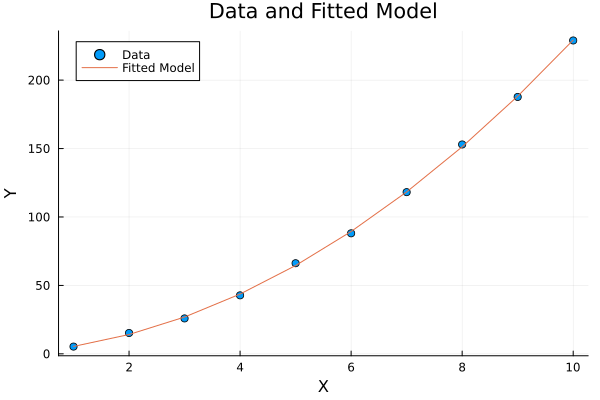

In [29]:
# Extract fitted parameters
fit_params = coef(fit)

# Generate fitted curve using fitted parameters
y_fit = model(x_data, fit_params)

# Plot data points
scatter(x_data, y_data, label="Data")

# Plot fitted curve
plot!(x_data, y_fit, label="Fitted Model")
xlabel!("X")
ylabel!("Y")
title!("Data and Fitted Model")



In [30]:
x = [i for i in -5:5]
y = f2.(x)

11-element Vector{Int64}:
 -125
  -64
  -27
   -8
   -1
    0
    1
    8
   27
   64
  125

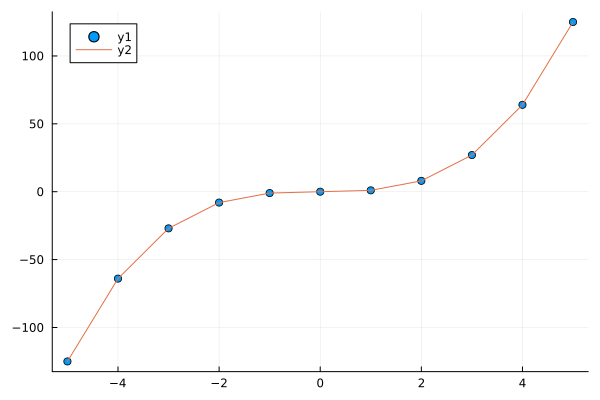

In [31]:
scatter(x, y)
plot!(x, y)

___
## Calling C Functions in Julia
___ 
Just like Python, Julia also _support interoperability with other languages_, allowing developers to easily integrate code written in languages like **C, C++, and Fortran**.\

The following  example demonstrates how to call a simple C function from within Julia.\
The C code written in a file named `mylib.c` and compiled as `gcc -fPIC -shared -o mylib.so mylib.c `

In [32]:
@ccall "./mylib.so".jSum(5::Cint, 10::Cint)::Cint


15